## Prédiction d'un  crédit bancaire

In [59]:
##importations des  packages  
import pandas as pd
import numpy as  np
import matplotlib.pyplot  as plt 
import seaborn as  sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
import pickle

In [2]:
##importations des donnés  
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

##lire les prémirères  lignes  de  la base  de  données  
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
## les dimensions  de note base  de données  
df.shape

(614, 13)

### Nétoyage de  la base de données 

In [4]:
### les  valeurs  manquantes  
df.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [5]:
## les valeurs  anormales des variables  numériques 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
## les valeurs  anormales des variables  catégriques 
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
#partageons  notre  base  de  données  en variables  numériques et catégoriques 
## créons  deux listes 
num_data=[]
cat_data=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

In [8]:
## transformons  les  listes  en data frame 
num_data=pd.DataFrame(num_data)
num_data

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
ApplicantIncome,5849.0,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,...,12000.0,2400.0,3400.0,3987.0,3232.0,2900.0,4106.0,8072.0,7583.0,4583.0
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,NaN,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [9]:
##faisons  uns  transposition de  la  base  de données 
num_data=num_data.transpose()
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [10]:
cat_data=pd.DataFrame(cat_data)
cat_data=cat_data.transpose()
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


## Traitons  les  valeurs  manquantes  

In [11]:
##pour  les varibles  catégorielles on  va  remplacer  les  valeurs  manquantes  par  les  valeurs  qui se  répètent  le  plus 
cat_data=cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

### vérications  
cat_data.isnull().sum().any()

False

In [12]:
## Pour  les  variables  catégorielles ,remplaçons  les valeurs  manquantes  par  la moyenne 
num_data=num_data.apply(lambda x: x.fillna(x.mean()))

### vérications  
num_data.isnull().sum().any()

False

In [13]:
## Transformons  les  variables catégorielles en  numériques  
## Variables  loan_status
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']

## supprimons la  colonne  Loan_status

cat_data.drop(['Loan_Status'], axis=1,inplace =True)

target=target.map(target_value)

target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [14]:
## Poue  Gender
gender_value={"Male":1,
              "Female":0
             }
cat_data['Gender']=cat_data['Gender'].map(gender_value)

##Pour Married
Married_value={"Yes":1,
               "No":0
              }
cat_data['Married']=cat_data['Married'].map(Married_value)

##Pour Dependents
Dependents_value={"0":1, 
                  "1":0,
                  "2":2, 
                  "3+":3
                 }
cat_data['Dependents']=cat_data['Dependents'].map(Dependents_value)

##Pour Education
Education_value={"Graduate":1, 
                 "Not Graduate":0
                 }
cat_data['Education']=cat_data['Education'].map(Education_value)

##Pour Self_Employed
Self_Employed_value={"Yes":1, 
                 "No":0
                 }
cat_data['Self_Employed']=cat_data['Self_Employed'].map(Self_Employed_value)

##Pour Property_Area
Property_Area_value={"Urban":1, 
                     "Rural":0,
                     "Semiurban":2
                 }
cat_data['Property_Area']=cat_data['Property_Area'].map(Property_Area_value)


In [15]:
##Vérifications  
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,1,0,1,1,0,1
1,LP001003,1,1,0,1,0,0
2,LP001005,1,1,1,1,1,1
3,LP001006,1,1,1,0,0,1
4,LP001008,1,0,1,1,0,1
...,...,...,...,...,...,...,...
609,LP002978,0,0,1,1,0,0
610,LP002979,1,1,3,1,0,0
611,LP002983,1,1,0,1,0,1
612,LP002984,1,1,2,1,0,1


In [16]:
## Suprimons  la  colonne  loan_id
cat_data.drop('Loan_ID',axis=1,inplace =True)

In [17]:
###Concatenons  les  deux data frames et  la  colonne target  
df_final = pd.concat( [cat_data,num_data,target],axis=1)
y=target

In [18]:
## Vérifions  
df_final.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,1,1,0,1,5849.0,0.0,146.412162,360.0,1.0,1
1,1,1,0,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0
2,1,1,1,1,1,1,3000.0,0.0,66.000000,360.0,1.0,1
3,1,1,1,0,0,1,2583.0,2358.0,120.000000,360.0,1.0,1
4,1,0,1,1,0,1,6000.0,0.0,141.000000,360.0,1.0,1


### Analyse Exploratoire

In [19]:
##Començons  par target
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

Pourcentage des  crédits  accordés : 0.3127035830618892
Pourcentage des  crédits  non accordés : 0.6872964169381107


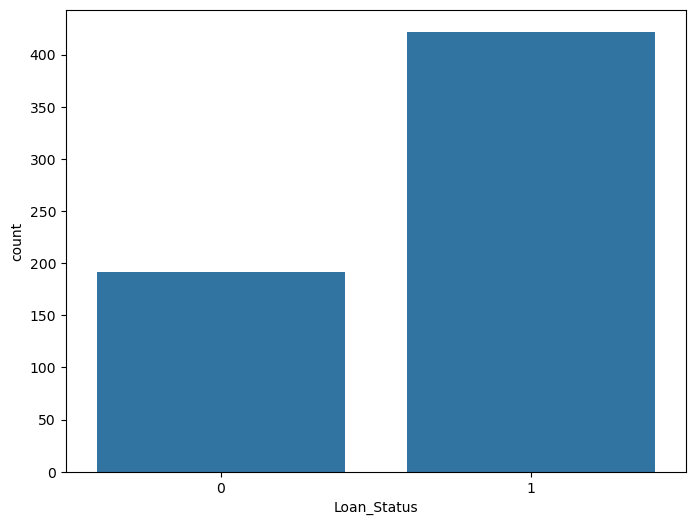

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=df_final)
yes=target.value_counts()[0]/len(target)
No=target.value_counts()[1]/len(target)

print(f"Pourcentage des  crédits  accordés : {yes}")
print(f"Pourcentage des  crédits  non accordés : {No}")

E:\puthon pratique\ana\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


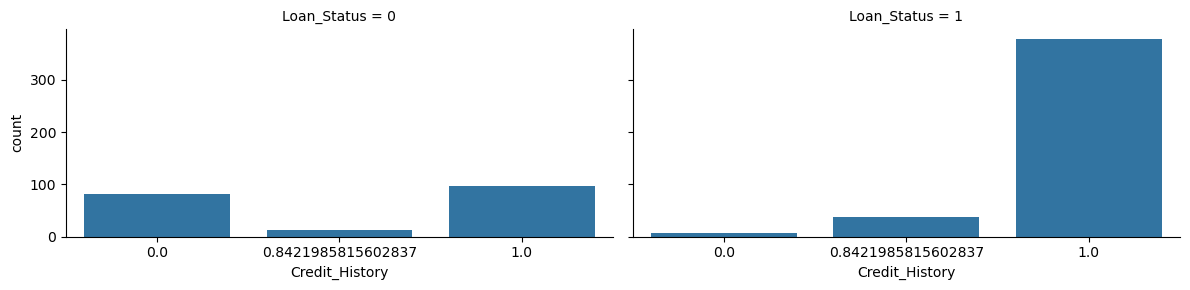

In [21]:
#Credit_History
grid =sns.FacetGrid(df_final,col='Loan_Status', aspect=2)
grid.map(sns.countplot,'Credit_History')
plt.show()

E:\puthon pratique\ana\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


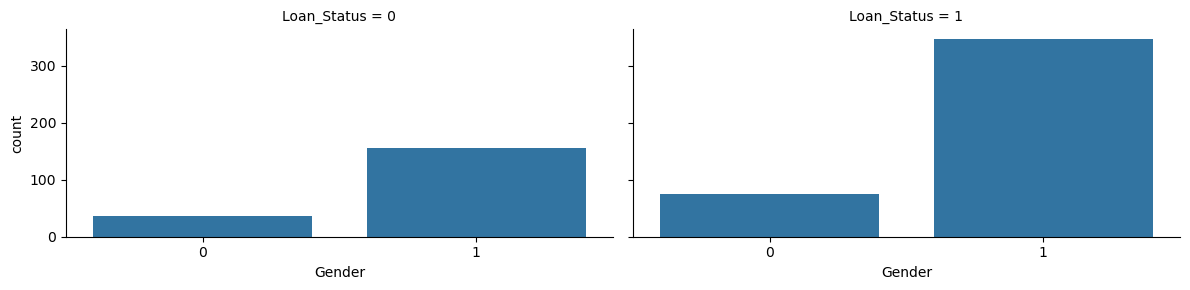

In [22]:
#le sexe
grid =sns.FacetGrid(df_final,col='Loan_Status', aspect=2)
grid.map(sns.countplot,'Gender')
plt.show()

E:\puthon pratique\ana\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


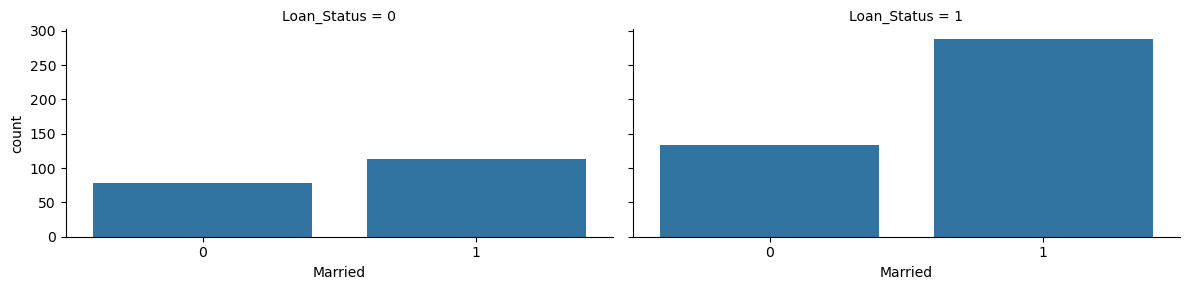

In [23]:
#marié
grid =sns.FacetGrid(df_final,col='Loan_Status', aspect=2)
grid.map(sns.countplot,'Married')
plt.show()

E:\puthon pratique\ana\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


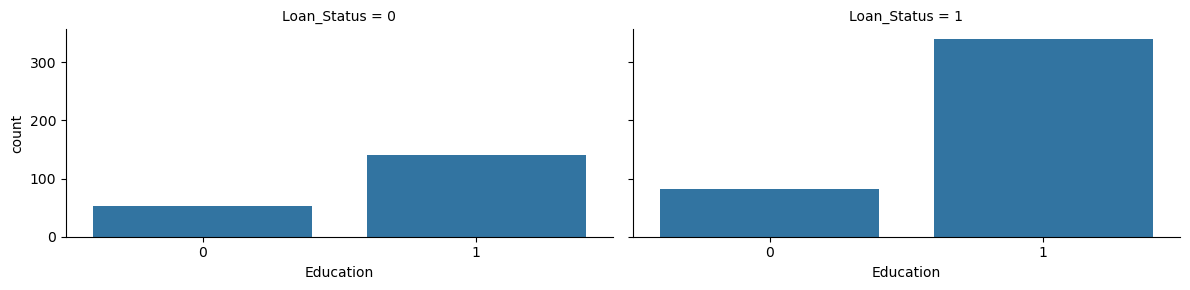

In [24]:
#Education
grid =sns.FacetGrid(df_final,col='Loan_Status', aspect=2)
grid.map(sns.countplot,'Education')
plt.show()

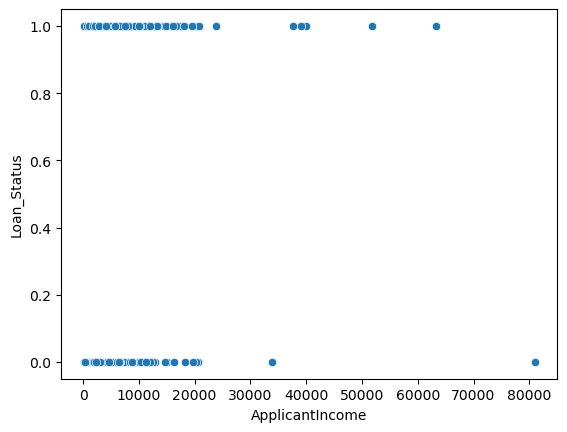

In [25]:
## Les révenus des demandeurs 
sns.scatterplot(x='ApplicantIncome', y='Loan_Status', data= df_final)
plt.show()

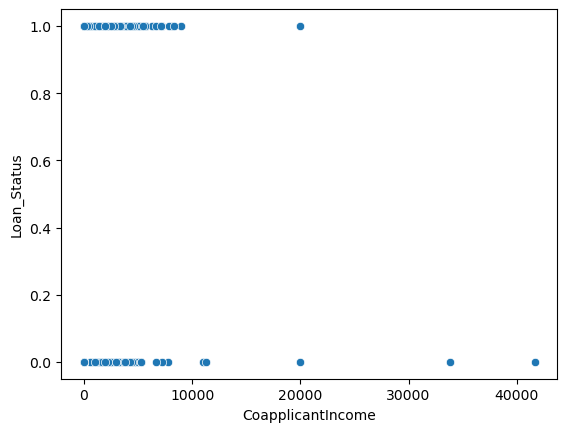

In [26]:
## le revenu du conjoin CoapplicantIncome
sns.scatterplot(x='CoapplicantIncome', y='Loan_Status', data= df_final)
plt.show()

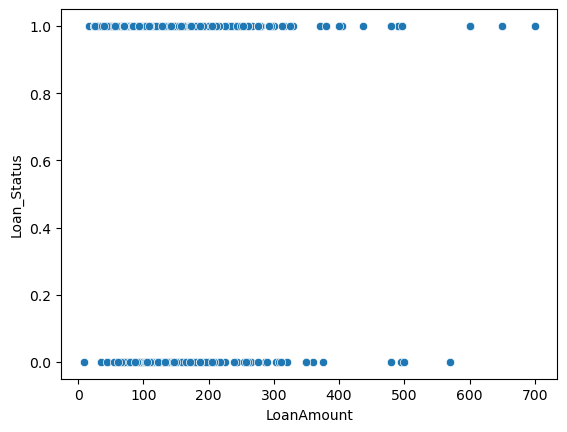

In [29]:
## L'impact du compte du demandeur
sns.scatterplot(x='LoanAmount', y='Loan_Status', data= df_final)
plt.show()

In [33]:
df_final.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,0.807292,0.588542,1.130208,0.729167,0.135417,0.921875,5446.078125,1877.807292,150.945488,344.000000,0.562232
1,0.822275,0.682464,1.180095,0.805687,0.132701,1.163507,5384.068720,1504.516398,144.349606,341.090047,0.969577


In [72]:
df_final.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,0.0,1.0,3833.5,268.0,133.5,360.0,1.0
1,1.0,1.0,1.0,1.0,0.0,1.0,3812.5,1239.5,128.0,360.0,1.0


### Réalisation du  modèle

In [62]:
#Division  la  base  de  données  en  base  d'entrainement et de  test 
#sss=train_test_splitt(n_splits=1, test_size=0.2, random_state=42)
X=df_final
Y=target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=y, random_state=42)
#for train,test in sss.split(X,Y):
    #X_train,X_test=X.iloc[train],X.iloc[test]
    #Y_train,Y_test=Y.iloc[train],Y.iloc[test]


print("X-train taillee", X_train.shape)
print("X-test taillee", X_test.shape)
print("Y-train taillee", Y_train.shape)
print("Y-train taillee", Y_test.shape)

X-train taillee (491, 12)
X-test taillee (123, 12)
Y-train taillee (491,)
Y-train taillee (123,)


In [64]:
# Nous ferros  trois  alogorithmes  de machine  learning
## Regression  , KNN,  DecisionTree
models={ "LogisticRegression":LogisticRegression(random_state=42),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=5,random_state=42)
       }


In [65]:
##Fonction  de  précision  
def  accu(y_true,y_pred, retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return  acc
    else:
        print("La precision du  model  est ", acc)

In [69]:
##Fonction  d'application des  models  
def train_test_eval(models,  X_train,  Y_train,  X_test,Y_test):
    for name,model in models.items():
        print(name ,":")
        model.fit(X_train,Y_train)
        accu(Y_test,model.predict(X_test))
        print("-"*30)

train_test_eval(models,  X_train,  Y_train,  X_test,Y_test)

LogisticRegression :
La precision du  model  est  1.0
------------------------------
KNeighborsClassifier :
La precision du  model  est  0.6504065040650406
------------------------------
DecisionTreeClassifier :
La precision du  model  est  1.0
------------------------------


E:\puthon pratique\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
## Les  variables ayant  un  impact  considérable  sur  notre  variable  cible
X2=X[['Credit_History','Gender','Married','CoapplicantIncome','ApplicantIncome']]
X2.head()

,Credit_History,Gender,Married,CoapplicantIncome,ApplicantIncome
0,1.0,1,0,0.0,5849.0
1,1.0,1,1,1508.0,4583.0
2,1.0,1,1,0.0,3000.0
3,1.0,1,1,2358.0,2583.0
4,1.0,1,0,0.0,6000.0


In [81]:
 
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, stratify=y, random_state=42)
print("X-train taillee", X_train.shape)
print("X-test taillee", X_test.shape)
print("Y-train taillee", Y_train.shape)
print("Y-train taillee", Y_test.shape)

X-train taillee (491, 5)
X-test taillee (123, 5)
Y-train taillee (491,)
Y-train taillee (123,)


In [82]:
train_test_eval(models,  X_train,  Y_train,  X_test,Y_test)

LogisticRegression :
La precision du  model  est  0.8617886178861789
------------------------------
KNeighborsClassifier :
La precision du  model  est  0.6585365853658537
------------------------------
DecisionTreeClassifier :
La precision du  model  est  0.7967479674796748
------------------------------


E:\puthon pratique\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
#Prenons  la  régression  logistique  sur  otre  bes  de  données  
regressor=LogisticRegression()
regressor.fit(X2, Y)

E:\puthon pratique\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
#Enregistrons  notre model
pickle.dump(regressor,open('model.pkl','wb'))